# Pymaceuticals Inc.
---

### Analysis

- When looking at the top four drug regimes, which include treatments with Capomulin, Ramicane, Infubinol, and Ceftamin; Capomulin and Ramicane regimes seem to result in lower final tumor volumes than treatments with Infubinol and Ceftamin.
- However, as the bar charts show, more treatments were conducted with Capomulin and Ramicane than with any other drugs, which may produce more reliable results. This does not mean that these two drugs are better or worse than the others but should still be considered when drawing final conclusions. 
- When looking back at the top four regimes, there was only one outlier amongst all of them, which is a promising aspect towards reliable results.
- Capomulin specifically starts reducing tumor volume about 20 days after treatment begin.
- The average tumor volume and weight of the mice are strongly positively correlated under the Capomulin regime. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_grouped = combined_data.groupby(["Mouse ID", "Timepoint"]).count()
sorted_combined_grouped = combined_grouped.sort_values(by = "Drug Regimen", ascending = False)
sorted_combined_grouped.head(10)
sorted_combined_grouped.iloc[0,:]

Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (g989, 20), dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined = combined_data.drop(combined_data.index[908:921])

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_combined["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_dr = cleaned_combined.groupby("Drug Regimen")
tv_mean = grouped_dr["Tumor Volume (mm3)"].mean()
tv_mean = tv_mean.rename("Tumor Volume Mean")
tv_median = grouped_dr["Tumor Volume (mm3)"].median()
tv_median = tv_median.rename("Tumor Volume Median")

tv_var = grouped_dr["Tumor Volume (mm3)"].var()
tv_var = tv_var.rename("Tumor Volume Variance")
tv_std = grouped_dr["Tumor Volume (mm3)"].std()
tv_std = tv_std.rename("Tumor Volume Std. Dev.")
tv_sem = grouped_dr["Tumor Volume (mm3)"].sem()
tv_sem = tv_sem.rename("Tumor Volume Std. Err.")

stats_summary = pd.concat([tv_mean,tv_median,tv_var,tv_std,tv_sem],axis=1)
stats_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

stats_summary_agg = grouped_dr.agg(["mean", "median", "var", "std", "sem"])
stats_summary_agg.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

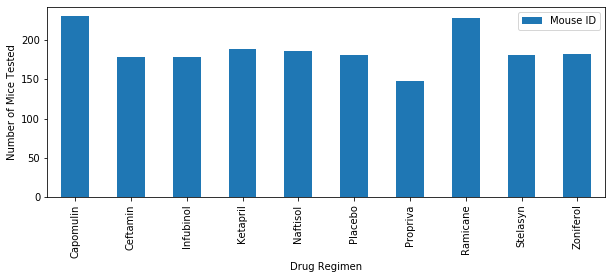

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
id_count = pd.DataFrame(grouped_dr["Mouse ID"].count())

#Plot
figure_1 = id_count.plot(kind="bar", figsize=(10,3.5))
figure_1.set_ylabel("Number of Mice Tested")

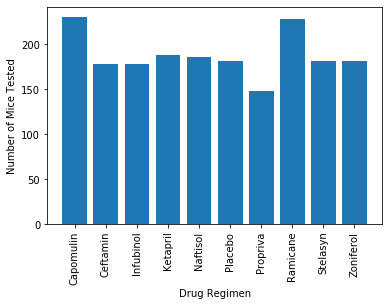

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", 
                "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
mouse_id = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

# Set x-axis
x_axis = np.arange(len(drug_regimen))

# Set tick locations
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
# Plot bar chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.bar(x_axis, mouse_id, align="center")
plt.xticks(tick_locations, drug_regimen, rotation="vertical")
plt.show()

Text(0, 0.5, 'Sex')

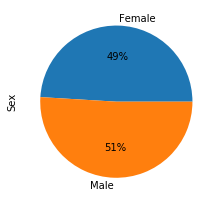

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create Data Frame
grouped_fm = cleaned_combined.groupby("Sex")
fm_count = grouped_fm["Mouse ID"].count()
fm_count_df = pd.DataFrame(grouped_fm["Mouse ID"].count())
fm_count_df

#Plot
figure_2 = fm_count.plot(kind="pie", figsize=(10,3.5), y ='Sex', autopct="%1.0f%%")
figure_2.set_ylabel("Sex")

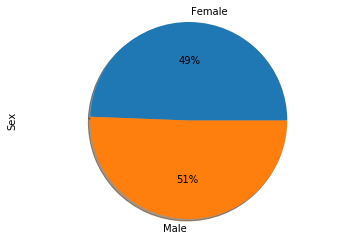

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
mouse_id = [935, 958]


plt.pie(mouse_id, labels=sex, autopct="%1.0f%%", shadow=True)
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_max = pd.DataFrame(cleaned_combined.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns = {"Timepoint": "Max Timepoint"}) 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max = pd.merge(cleaned_combined, grouped_max, on = "Mouse ID")

# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_tv = []

# append list with final tumor volume data and calculate IQR and outliers
for drug in drug_list:
    
    #dataframe with only the treatments in drug_list 
    only_drug_list = merged_max.loc[merged_max["Drug Regimen"] == drug]
    
    #dataframe with only the final timepoint for each regimen
    max_tv = only_drug_list.loc[only_drug_list["Timepoint"] == only_drug_list["Max Timepoint"]]
    
    #append drug_tv with final tumor volume values
    tv_values = max_tv['Tumor Volume (mm3)']
    drug_tv.append(tv_values)
    
    # calculate quartiles
    quartiles = tv_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The interquartile range of {drug}  is: {iqr}")
    
    # calculate lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be outliers for {drug}.")
    
    # calculate outliers
    outliers = (tv_values.loc[(only_drug_list['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (only_drug_list['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f"The outliers for {drug}  are: {outliers}")

The interquartile range of Capomulin  is: 7.781863460000004
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
The outliers for Capomulin  are: 0
The interquartile range of Ramicane  is: 9.098536719999998
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
The outliers for Ramicane  are: 0
The interquartile range of Infubinol  is: 11.477135160000003
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
The outliers for Infubinol  are: 1
The interquartile range of Ceftamin  is: 15.577752179999997
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.
The outliers for Ceftamin  are: 0


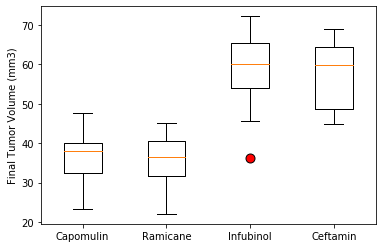

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
bp = ax1.boxplot(drug_tv)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.setp(bp['fliers'], markerfacecolor='red', marker='o', markersize = 9)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume of Mouse l509 under Capomulin Treatment')

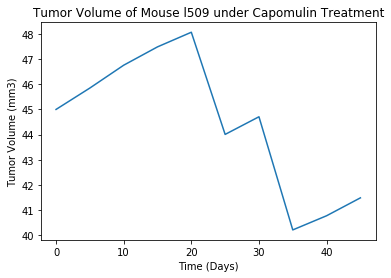

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Find Mouse ID of a mouse treated with Capomulin
cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Capomulin"]
cleaned_combined.loc[cleaned_combined["Mouse ID"] == "l509"]

# Grab that mouse by its ID
mouse_capo = cleaned_combined.loc[cleaned_combined["Mouse ID"] == "l509"]

# Plot graph
x_axis = mouse_capo["Timepoint"]
y_axis = mouse_capo["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse l509 under Capomulin Treatment")

Text(0.5, 1.0, 'Average Tumor Volume by Weight')

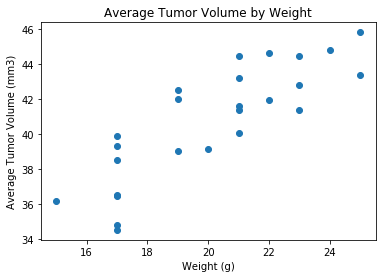

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Grab mice only treated with Capomulin
capo_only = cleaned_combined.loc[cleaned_combined["Drug Regimen"] == "Capomulin"]

# Find average tumor volume for each mouse 
avg_tv_capo = pd.DataFrame(capo_only.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns = {"Tumor Volume (mm3)": "Avg Tumor Volume"}) 
merged_capo = pd.merge(capo_only, avg_tv_capo, on = "Mouse ID")
tv_capo = merged_capo[["Weight (g)", "Avg Tumor Volume"]].drop_duplicates()

# Plot graph
capo_weight = tv_capo["Weight (g)"]
capo_avg_tv = tv_capo["Avg Tumor Volume"]
plt.scatter(capo_weight, capo_avg_tv)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


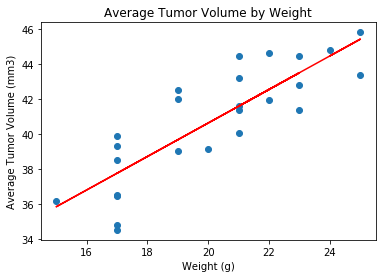

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coefficient
cc_capo = round(st.pearsonr(capo_weight, capo_avg_tv)[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {cc_capo}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_weight, capo_avg_tv)
regress_values = slope * capo_weight + intercept

# Plot whole graph with regression line
capo_weight = tv_capo["Weight (g)"]
capo_avg_tv = tv_capo["Avg Tumor Volume"]
plt.scatter(capo_weight, capo_avg_tv)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.plot(capo_weight, regress_values, "r-")